### Исследование датасета 1_w 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

warnings.filterwarnings('ignore')


Настройка отображения

In [3]:
plt.rcParams['figure.figsize'] = (15, 10)
sns.set_style("whitegrid")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

### Загрузка и обзор сырых данных

In [4]:
df = pd.read_csv('data/1_w.csv', encoding='cp1251', sep=';')

Размер

In [5]:
df.shape

(675, 70)

Параметры признаков

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675 entries, 0 to 674
Data columns (total 70 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   len                                                                       675 non-null    float64
 1   Скорость                                                                  675 non-null    float64
 2   Широта                                                                    675 non-null    float64
 3   Долгота                                                                   675 non-null    float64
 4   Высота                                                                    675 non-null    float64
 5   X Rotation                                                                675 non-null    float64
 6   Y Rotation                                                        

In [7]:
df.head()

,len,Скорость,Широта,Долгота,Высота,X Rotation,Y Rotation,Вес мгновенный,"Уровень топлива, литры","Уровень топлива, проценты",путь,ДВС.Расход топлива,Ускорение по оси X,Ускорение по оси Y,Ускорение по оси Z,Статус самосвала,Самосвал,Модель самосвала,Грузоподъемность,Обороты двигателя,Расчетный выходной крутящий момент двигателя (в процентах от эталонного),Текущая нагрузка двигателя,Педаль процент нажатия,Давление в левой передней шине,Температура в левой передней шине,Давление в правой передней шине,Температура в правой передней шине,Давление в левой задней внешней шине,Температура в левой задней внешней шине,Давление в левой задней внутренней шине,Температура в левой задней внутренней шине,Давление в правой задней внутренней шине,Температура в правой задней внутренней шине,Давление в правой задней внешней шине,Температура в правой задней внешней шине,folder,border_lists,время рейса,Расход топлива_средний,Расход топлива,Давление левый передний цилиндр,Давление правый передний цилиндр,Давление левый задний цилиндр,Давление правый задний цилиндр,Продольный наклон,Поперечный наклон,azimut,Давление левый передний цилиндр_,Давление правый передний цилиндр_,Давление левый задний цилиндр_,Давление правый задний цилиндр_,point,"уровень давления впереди,МПа","уровень давления сзади,МПа",nom_hole,рекомендованная скорость_turns,Поворот влево,Поворот вправо,centr,radius,подъем,спуск,incline,рекомендованная скорость_min,рекомендованная скорость_max,new_slope,incline_,indicator_slope,mean_slope,shtraf
0,0.0,8.0,60.646058,59.714841,334.0,79.736983,-0.466904,99.0,NaN,92.8,0.000000,NaN,0.008057,1.048584,0.183228,Груженный движется вперед,32,75131,130,NaN,NaN,NaN,NaN,748.0,19.0,740.0,15.0,748.0,28.0,740.0,22.0,696.0,23.0,740.0,24.0,/home/pi/adviser/route1,[],686,0.0,NaN,7.7,9.2,10.4,9.2,1.728200,6.045742,-0.675910,7.300,7.300,11.02,7.6,point_90%,7.3,7.6,1,0,0,0,-,0.0,0,0,up,0.0,0.0,1.728200,up,0,0.010000,0.000000
1,2.0,8.0,60.646048,59.714865,333.9,78.123769,-4.759739,99.0,NaN,92.8,1.690442,NaN,0.077881,1.008423,-0.045288,Груженный движется вперед,32,75131,130,NaN,NaN,NaN,NaN,748.0,19.0,740.0,15.0,748.0,28.0,740.0,22.0,696.0,23.0,740.0,24.0,/home/pi/adviser/route1,[],686,NaN,NaN,9.8,9.6,10.4,6.8,2.085185,3.745994,-1.023756,10.585,10.585,11.02,7.6,point_90%,7.3,7.6,1,0,0,0,-,0.0,0,0,up,0.0,0.0,2.085185,up,0,0.010000,0.000000
2,4.0,9.0,60.646032,59.714886,334.0,84.516539,-0.780620,99.0,NaN,92.8,2.150653,NaN,0.008057,1.097900,0.059692,Груженный движется вперед,32,75131,130,NaN,NaN,NaN,NaN,748.0,19.0,740.0,15.0,748.0,28.0,740.0,22.0,696.0,23.0,740.0,24.0,/home/pi/adviser/route1,[],686,NaN,NaN,9.8,9.6,7.2,7.5,2.135208,2.511116,-0.932699,10.585,10.585,7.60,7.6,point_90%,7.3,7.6,1,0,0,0,-,0.0,0,0,up,9.0,0.0,2.135208,up,0,0.010000,0.000000
3,7.0,9.0,60.646012,59.714915,334.3,83.064053,-3.043537,99.0,NaN,92.8,2.702545,NaN,0.042114,0.956177,0.032104,Груженный движется вперед,32,75131,130,NaN,NaN,NaN,NaN,748.0,19.0,740.0,15.0,748.0,28.0,740.0,22.0,696.0,23.0,740.0,24.0,/home/pi/adviser/route1,[],686,NaN,NaN,9.8,8.3,7.2,7.5,1.983704,2.077242,-0.877463,10.585,10.585,7.60,7.6,point_90%,7.3,7.6,1,0,0,0,-,0.0,0,0,up,9.5,0.0,1.983704,up,0,0.010000,0.000000
4,9.0,9.0,60.645999,59.714938,334.1,85.258071,-1.037494,99.0,NaN,92.8,1.978095,NaN,0.017822,0.995605,0.047729,Груженный движется вперед,32,75131,130,NaN,NaN,NaN,NaN,748.0,19.0,740.0,15.0,748.0,28.0,740.0,22.0,696.0,23.0,740.0,24.0,/home/pi/adviser/route1,[],686,NaN,NaN,7.5,7.6,8.3,7.0,1.716917,2.217528,-0.827510,7.300,10.585,7.60,7.6,point_90%,7.3,7.6,1,0,0,0,-,0.0,0,0,up,0.0,0.0,1.716917,up,0,1.983074,0.388857


### Структуры и типы данных

In [8]:
df.columns

Index(['len', 'Скорость', 'Широта', 'Долгота', 'Высота', 'X Rotation',
       'Y Rotation', 'Вес мгновенный', 'Уровень топлива, литры',
       'Уровень топлива, проценты', 'путь', 'ДВС.Расход топлива',
       'Ускорение по оси X', 'Ускорение по оси Y', 'Ускорение по оси Z',
       'Статус самосвала', 'Самосвал', 'Модель самосвала', 'Грузоподъемность',
       'Обороты двигателя',
       'Расчетный выходной крутящий момент двигателя (в процентах от эталонного)',
       'Текущая нагрузка двигателя', 'Педаль процент нажатия',
       'Давление в левой передней шине', 'Температура в левой передней шине',
       'Давление в правой передней шине', 'Температура в правой передней шине',
       'Давление в левой задней внешней шине',
       'Температура в левой задней внешней шине',
       'Давление в левой задней внутренней шине',
       'Температура в левой задней внутренней шине',
       'Давление в правой задней внутренней шине',
       'Температура в правой задней внутренней шине',
       'Д

In [9]:
len(df.columns)

70

In [10]:
type_counts = df.dtypes.value_counts()
for dtype, count in type_counts.items():
    print(f"{dtype}: {count}")

float64: 52
int64: 11
object: 7


In [11]:
analysis_data = []

for col in df.columns:
    col_info = {
        'Column': col,
        'Type': str(df[col].dtype),
        'Non_Null_Count': df[col].count(),
        'Null_Count': df[col].isnull().sum(),
        'Null_Percent': (df[col].isnull().sum() / len(df)) * 100,
        'Unique_Count': df[col].nunique(),
        'Unique_Percent': (df[col].nunique() / len(df)) * 100
    }
    
    if df[col].dtype == 'object':
        sample_values = df[col].dropna().head(3).tolist()
    else:
        sample_values = df[col].dropna().head(3).tolist()
    
    col_info['Sample_Values'] = str(sample_values)[:100] + "..." if len(str(sample_values)) > 100 else str(sample_values)
    analysis_data.append(col_info)

analysis_df = pd.DataFrame(analysis_data)


In [12]:
analysis_df

,Column,Type,Non_Null_Count,Null_Count,Null_Percent,Unique_Count,Unique_Percent,Sample_Values
0,len,float64,675,0,0.0,675,100.000000,"[0.0, 2.0, 4.0]"
1,Скорость,float64,675,0,0.0,42,6.222222,"[8.0, 8.0, 9.0]"
2,Широта,float64,675,0,0.0,672,99.555556,"[60.64605783333333, 60.64604833333333, 60.64603183333333]"
3,Долгота,float64,675,0,0.0,673,99.703704,"[59.71484083333333, 59.714865, 59.7148855]"
4,Высота,float64,675,0,0.0,430,63.703704,"[334.0, 333.9, 334.0]"
...,...,...,...,...,...,...,...,...
65,new_slope,float64,675,0,0.0,586,86.814815,"[1.72820031854721, 2.085184922179096, 2.1352075220941007]"
66,incline_,object,675,0,0.0,3,0.444444,"['up', 'up', 'up']"
67,indicator_slope,int64,675,0,0.0,13,1.925926,"[0, 0, 0]"
68,mean_slope,float64,675,0,0.0,41,6.074074,"[0.01, 0.01, 0.01]"


### Анализ и обработка таргетной переменной

In [13]:
point_counts = df['point'].value_counts()
print(point_counts)

point
-            477
point_30%     75
point_60%     74
point_90%     49
Name: count, dtype: int64


In [14]:
print((point_counts / len(df) * 100).round(2))

point
-            70.67
point_30%    11.11
point_60%    10.96
point_90%     7.26
Name: count, dtype: float64


То есть у нас получается без ям - 71%, вероятность 0,3 - 11%, вероятность 0,6 - 11%, вероятность 0,9 - 7%

In [15]:
df['hole_percentage'] = df['point'].str.extract(r'(\d+)%').astype(float)

def categorize_hole(percentage):
    if pd.isna(percentage):
        return 'no_hole'
    elif percentage == 30:
        return 'hole_30'
    elif percentage == 60:
        return 'hole_60'
    elif percentage == 90:
        return 'hole_90'
    else:
        return 'other'

In [16]:
df['hole_category'] = df['hole_percentage'].apply(categorize_hole)

In [17]:
hole_counts = df['hole_category'].value_counts()
print(hole_counts)

hole_category
no_hole    477
hole_30     75
hole_60     74
hole_90     49
Name: count, dtype: int64


Баланс классов:

In [18]:
print(f"Минимальный класс: {hole_counts.min()} ({hole_counts.min()/len(df)*100:.1f}%)")
print(f"Максимальный класс: {hole_counts.max()} ({hole_counts.max()/len(df)*100:.1f}%)")
print(f"Соотношение max/min: {hole_counts.max()/hole_counts.min():.1f}:1")


Минимальный класс: 49 (7.3%)
Максимальный класс: 477 (70.7%)
Соотношение max/min: 9.7:1


Text(0.5, 1.0, 'Распределение классов ям')

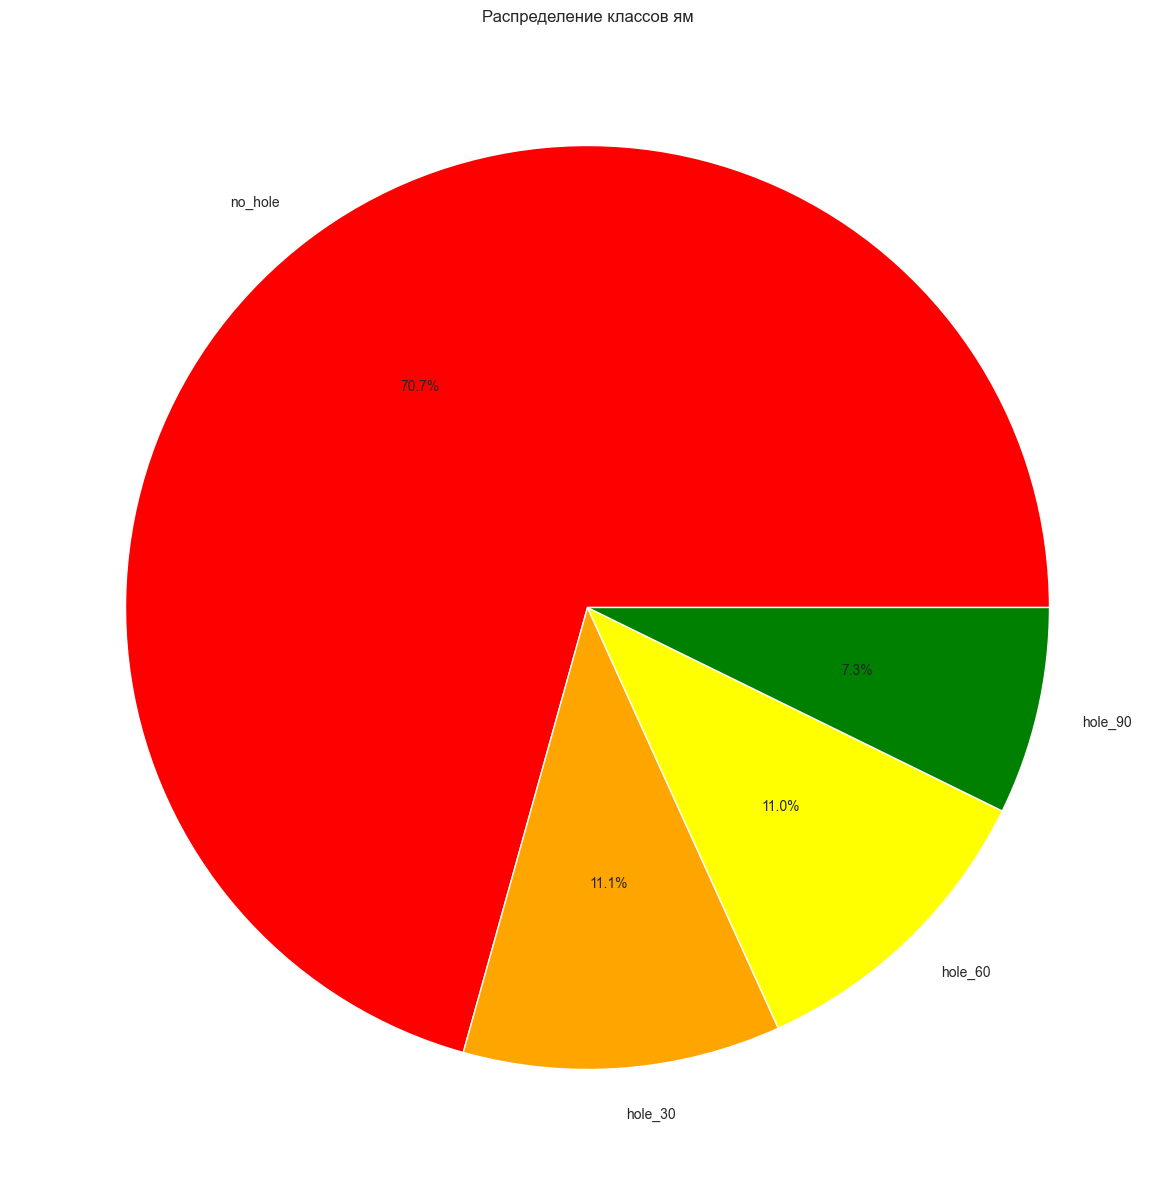

In [19]:
fig = plt.figure(figsize=(20, 15))

hole_counts = df['hole_category'].value_counts()
colors = ['red', 'orange', 'yellow', 'green', 'blue']
plt.pie(hole_counts.values, labels=hole_counts.index, autopct='%1.1f%%', colors=colors[:len(hole_counts)])
plt.title('Распределение классов ям')

### Предобработка данных

Статистика пропущенных значений

In [20]:
total_missing = df.isnull().sum().sum()
total_cells = df.shape[0] * df.shape[1]
missing_percent = (total_missing / total_cells) * 100

In [21]:
total_missing, total_cells, missing_percent

(np.int64(5876), 48600, np.float64(12.090534979423868))

Пропуски по колонкам

In [22]:
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)

if len(missing_data) > 0:
    for col, missing_count in missing_data.items():
        missing_percent = (missing_count / len(df)) * 100
        print(f"{col}: {missing_count} ({missing_percent:.1f}%)")

Уровень топлива, литры: 675 (100.0%)
ДВС.Расход топлива: 675 (100.0%)
Обороты двигателя: 675 (100.0%)
Расчетный выходной крутящий момент двигателя (в процентах от эталонного): 675 (100.0%)
Текущая нагрузка двигателя: 675 (100.0%)
Педаль процент нажатия: 675 (100.0%)
Расход топлива: 675 (100.0%)
Расход топлива_средний: 674 (99.9%)
hole_percentage: 477 (70.7%)


Можешь заметить, что в основном параметры у которых есть пропуски, имеют 100% по ним. Соотвественно мы можем сделать вывод, что данные параметры невалидны для дальнейшего использования

### Подбор ключевых признаков 

В данном случае мы рассмотрим числовые признаки, однако если вспомнить все наши данные, то в основом у нас все они имеют формат int & float, мы можем пока что не переживать насчет 7 признаков типа object, так как выборка нам позволяет их не рассматривать + в дальнейшим можем преобразовать

In [23]:
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()

In [24]:
len(numeric_columns)

64

Удаляем служебные колонки

In [25]:
exclude_columns = ['hole_percentage', 'len']  # Целевая переменная и длина маршрута
feature_columns = [col for col in numeric_columns if col not in exclude_columns]

In [26]:
len(feature_columns)

62

Получаем 62 признаки для анализа, нужно найти ключевые

Статистическое описание числовых параметров

In [27]:
df[feature_columns].describe()

,Скорость,Широта,Долгота,Высота,X Rotation,Y Rotation,Вес мгновенный,"Уровень топлива, литры","Уровень топлива, проценты",путь,ДВС.Расход топлива,Ускорение по оси X,Ускорение по оси Y,Ускорение по оси Z,Самосвал,Модель самосвала,Грузоподъемность,Обороты двигателя,Расчетный выходной крутящий момент двигателя (в процентах от эталонного),Текущая нагрузка двигателя,Педаль процент нажатия,Давление в левой передней шине,Температура в левой передней шине,Давление в правой передней шине,Температура в правой передней шине,Давление в левой задней внешней шине,Температура в левой задней внешней шине,Давление в левой задней внутренней шине,Температура в левой задней внутренней шине,Давление в правой задней внутренней шине,Температура в правой задней внутренней шине,Давление в правой задней внешней шине,Температура в правой задней внешней шине,время рейса,Расход топлива_средний,Расход топлива,Давление левый передний цилиндр,Давление правый передний цилиндр,Давление левый задний цилиндр,Давление правый задний цилиндр,Продольный наклон,Поперечный наклон,azimut,Давление левый передний цилиндр_,Давление правый передний цилиндр_,Давление левый задний цилиндр_,Давление правый задний цилиндр_,"уровень давления впереди,МПа","уровень давления сзади,МПа",nom_hole,рекомендованная скорость_turns,Поворот влево,Поворот вправо,radius,подъем,спуск,рекомендованная скорость_min,рекомендованная скорость_max,new_slope,indicator_slope,mean_slope,shtraf
count,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.0,0.0,675.000000,675.000000,0.0,675.000000,675.000000,675.000000,675.0,675.0,675.0,0.0,0.0,0.0,0.0,675.0,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.0,1.0,0.0,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,6.750000e+02,675.0,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.0,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000
mean,21.389630,60.648936,59.719564,405.184963,80.449497,-4.482450,99.0,NaN,93.246519,5.968504,NaN,0.080989,1.023769,0.093125,32.0,75131.0,130.0,NaN,NaN,NaN,NaN,748.0,19.574815,742.480000,15.147407,751.448889,29.706667,745.226667,23.601481,698.915556,24.457778,747.460741,25.865185,686.0,0.0,NaN,7.862963,7.212000,8.403556,6.830963,4.486225,5.095346,0.499214,7.770444,7.486556,8.042489,7.650667,7.300000e+00,7.6,2.231111,0.128889,0.004444,0.004444,0.047552,0.074074,0.0,0.201481,0.237037,4.598633,4.866667,0.275932,32.124165
std,7.058102,0.006348,0.006430,46.357750,3.427420,3.303966,0.0,NaN,0.992329,2.133920,NaN,0.060153,0.051042,0.092915,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.902026,1.928752,0.334696,1.340471,1.140125,2.841303,1.127172,1.746954,0.873477,1.877048,0.469262,0.0,NaN,NaN,1.260078,1.138582,1.206886,1.123292,2.399120,2.571236,1.402684,1.237908,0.783881,1.165347,0.413481,2.666511e-15,0.0,4.935781,1.382267,0.066568,0.066568,1.093657,0.262086,0.0,2.163598,2.676021,2.183449,2.700698,1.137459,15.558471
min,1.000000,60.641727,59.710818,332.300000,67.477582,-13.548378,99.0,NaN,90.800000,0.000000,NaN,-0.163940,0.736328,-0.208374,32.0,75131.0,130.0,NaN,NaN,NaN,NaN,748.0,19.000000,740.000000,15.000000,748.000000,28.000000,740.000000,22.000000,696.000000,23.000000,740.000000,24.000000,686.0,0.0,NaN,5.500000,5.100000,4.500000,3.300000,-1.869931,-1.169323,-2.851847,7.300000,7.300000,7.600000,7.600000,7.300000e+00,7.6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000
25%,17.000000,60.643297,59.714645,359.200000,78.395367,-6.873960,99.0,NaN,92.400000,4.833337,NaN,0.042419,0.992126,0.035645,32.0,75131.0,130.0,NaN,NaN,NaN,NaN,748.0,19.000000,740.000000,15.000000,752.000000,29.000000,744.000000,23.000000,696.068966,23.034483,748.000000,26.000000,686.0,0.0,NaN,7.000000,6.400000,7.600000,6.200000,2.782020,3.426107,0.028110,7.300000,7.300000,7.600000,7.600000,7.300000e+00,7.6,0.000000,0.000

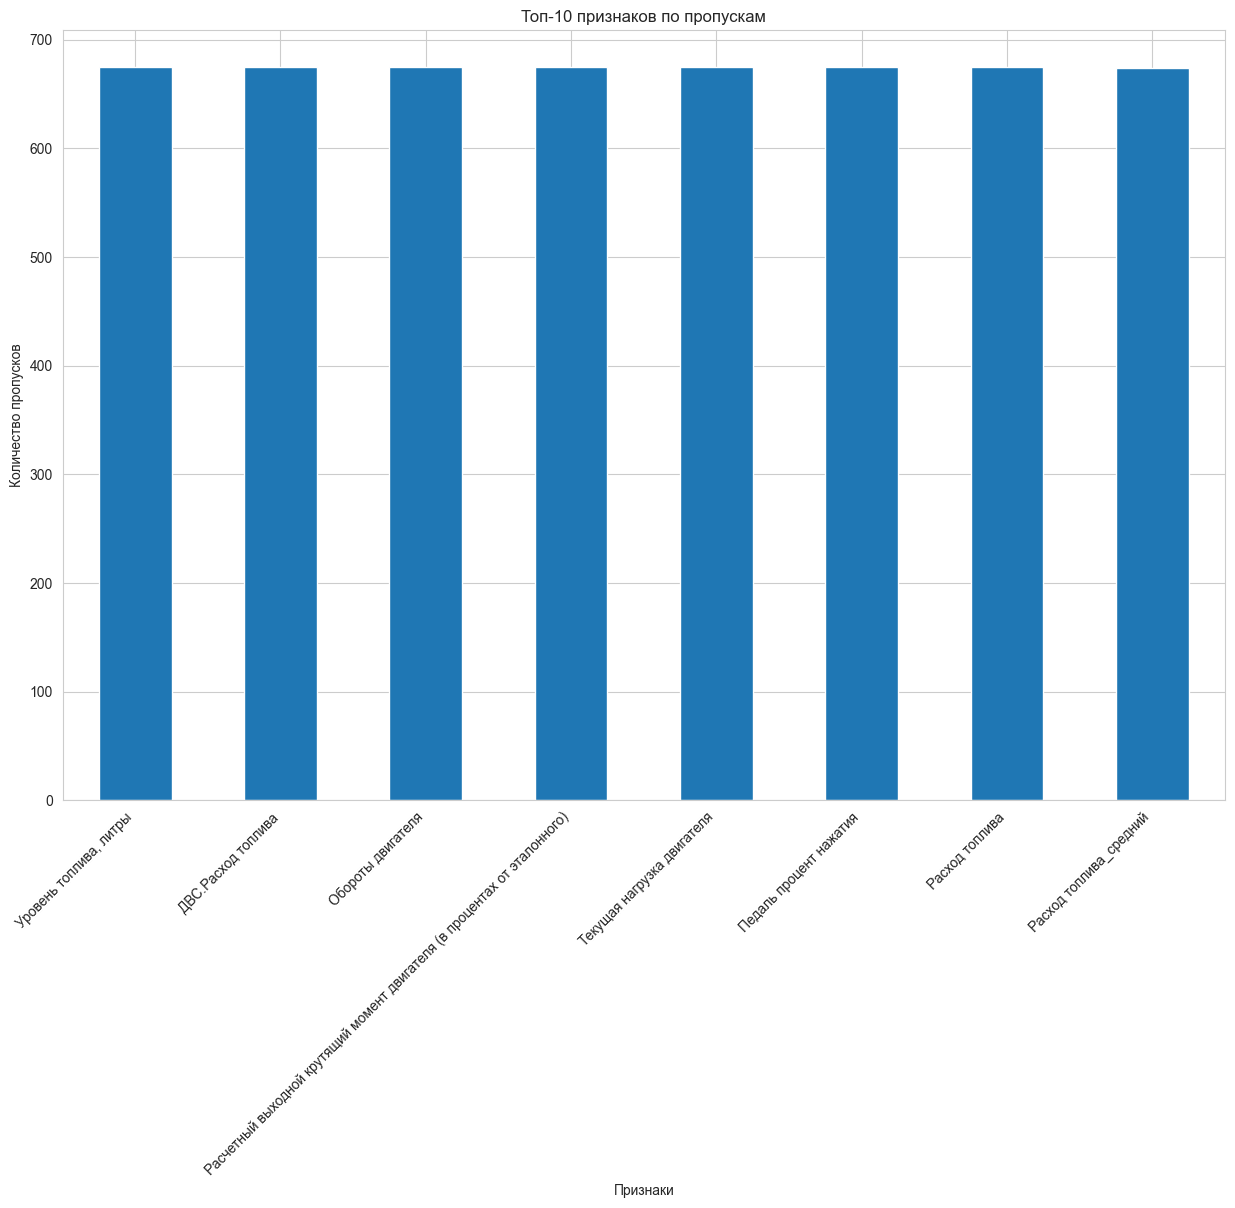

In [28]:
missing_data = df[feature_columns].isnull().sum()
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)
if len(missing_data) > 0:
    missing_data.head(10).plot(kind='bar')
    plt.title('Топ-10 признаков по пропускам')
    plt.xlabel('Признаки')
    plt.ylabel('Количество пропусков')
    plt.xticks(rotation=45, ha='right')
else:
    plt.text(0.5, 0.5, 'Нет пропущенных значений', ha='center', va='center', transform=plt.gca().transAxes)
    plt.title('Пропущенные значения')

Чтобы подобрать нужные признаки для обучения модели я бы проверил и автоматизировал процесс корреляции

In [29]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [30]:
le = LabelEncoder()
y_numeric = le.fit_transform(df['hole_category'])

In [31]:
correlations = []
for col in feature_columns:
    if df[col].notna().sum() > 0:
        corr = df[col].corr(pd.Series(y_numeric))
        if not pd.isna(corr):
            correlations.append({
                'feature': col,
                'correlation': abs(corr),
                'correlation_raw': corr,
                'missing_percent': (df[col].isnull().sum() / len(df)) * 100,
                'non_null_count': df[col].notna().sum()
            })


In [32]:
corr_df = pd.DataFrame(correlations).sort_values('correlation', ascending=False)

Топ-20 числовых признаков с высокой корреляций таргета

In [33]:
corr_df.head(20)

,feature,correlation,correlation_raw,missing_percent,non_null_count
34,nom_hole,0.760135,-0.760135,0.0,675
31,Давление левый задний цилиндр_,0.533315,-0.533315,0.0,675
29,Давление левый передний цилиндр_,0.492762,-0.492762,0.0,675
22,Давление левый передний цилиндр,0.484262,-0.484262,0.0,675
26,Продольный наклон,0.394201,0.394201,0.0,675
42,new_slope,0.375585,0.375585,0.0,675
6,"Уровень топлива, проценты",0.359713,0.359713,0.0,675
30,Давление правый передний цилиндр_,0.350452,-0.350452,0.0,675
24,Давление левый задний цилиндр,0.328109,-0.328109,0.0,675
8,Ускорение по оси X,0.312950,0.312950,0.0,675


Визуализация параметров и распределения корреляции 

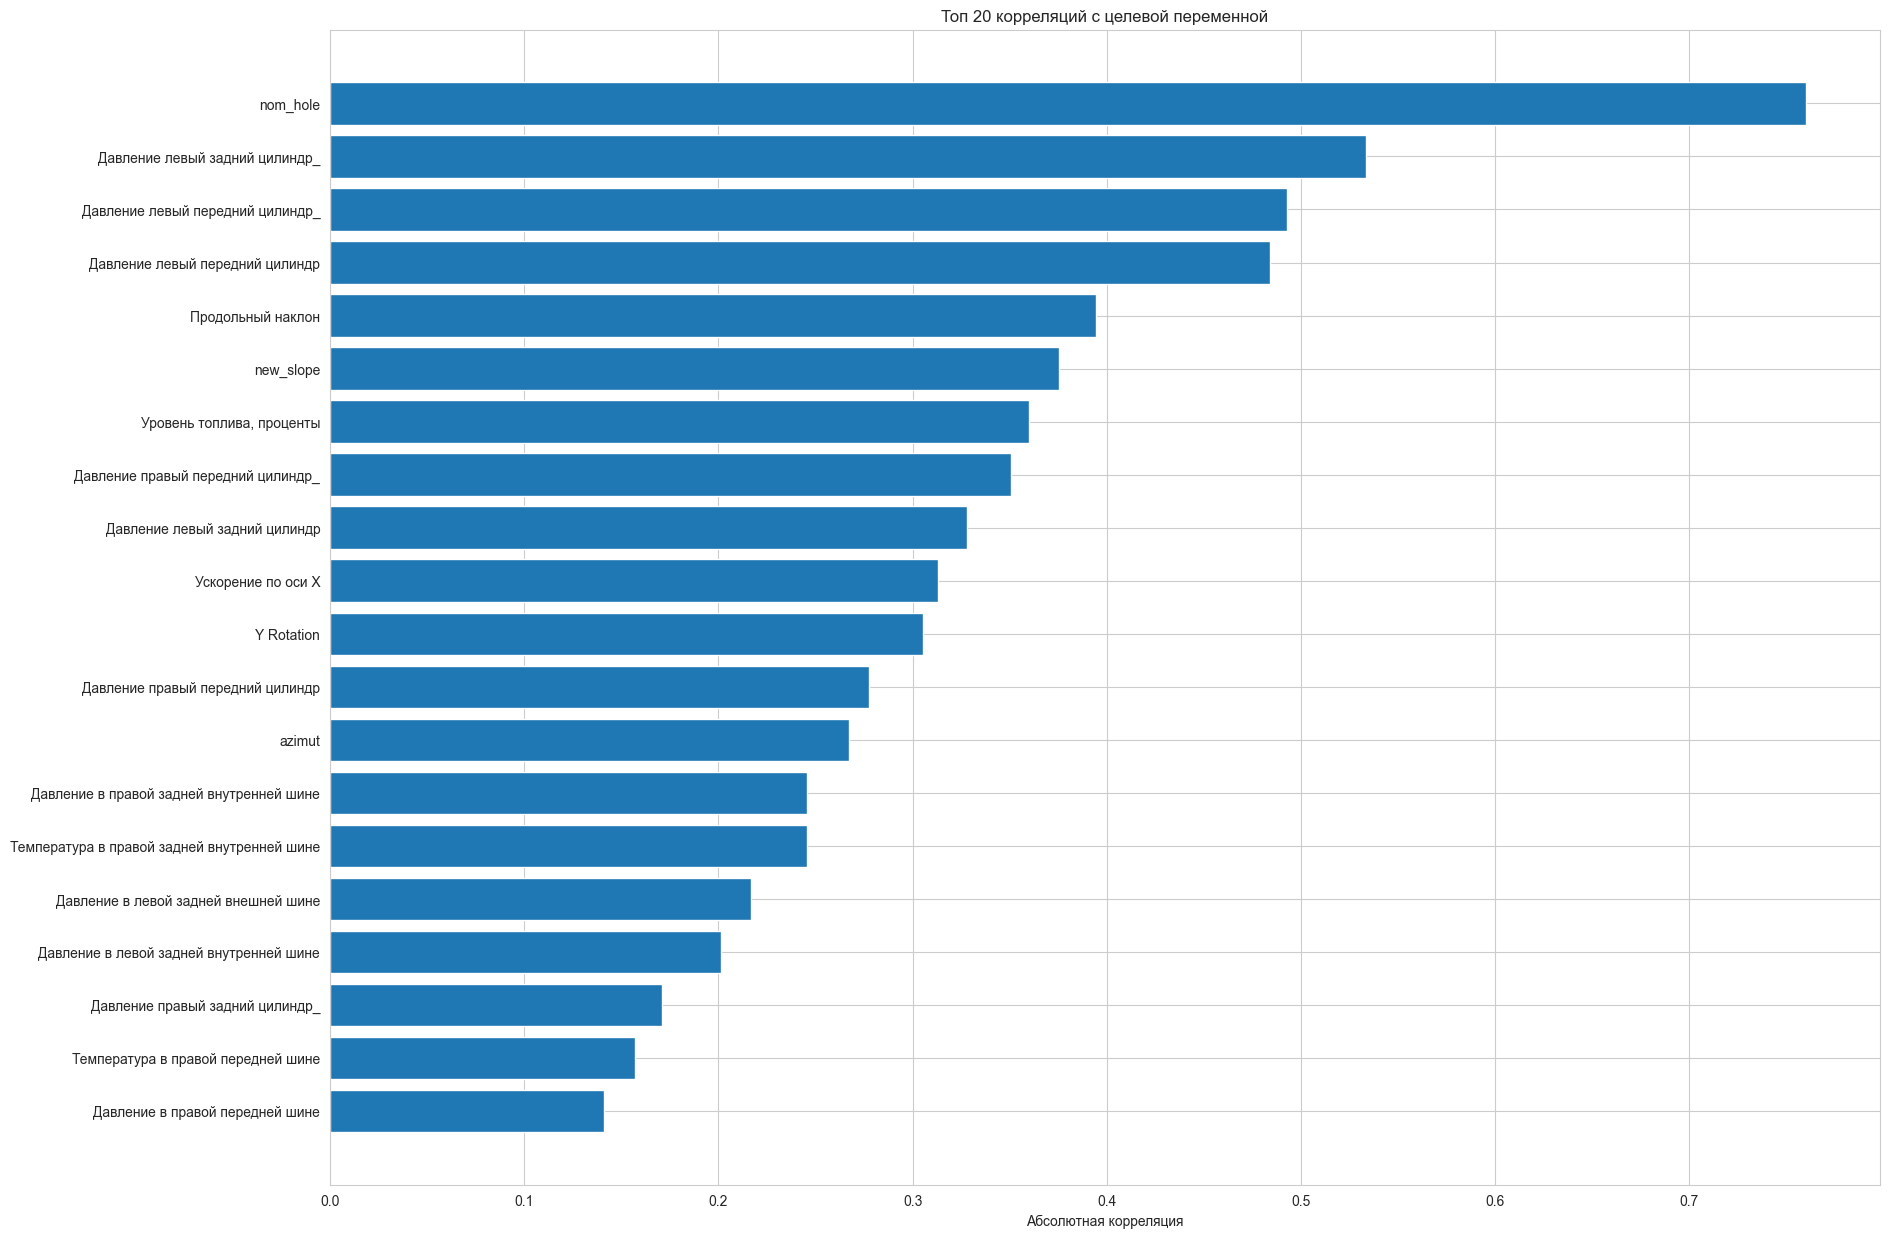

In [34]:
fig = plt.figure(figsize=(20, 15))

top_corr = corr_df.head(20)
plt.barh(range(len(top_corr)), top_corr['correlation'])
plt.yticks(range(len(top_corr)), top_corr['feature'])
plt.xlabel('Абсолютная корреляция')
plt.title('Топ 20 корреляций с целевой переменной')
plt.gca().invert_yaxis()

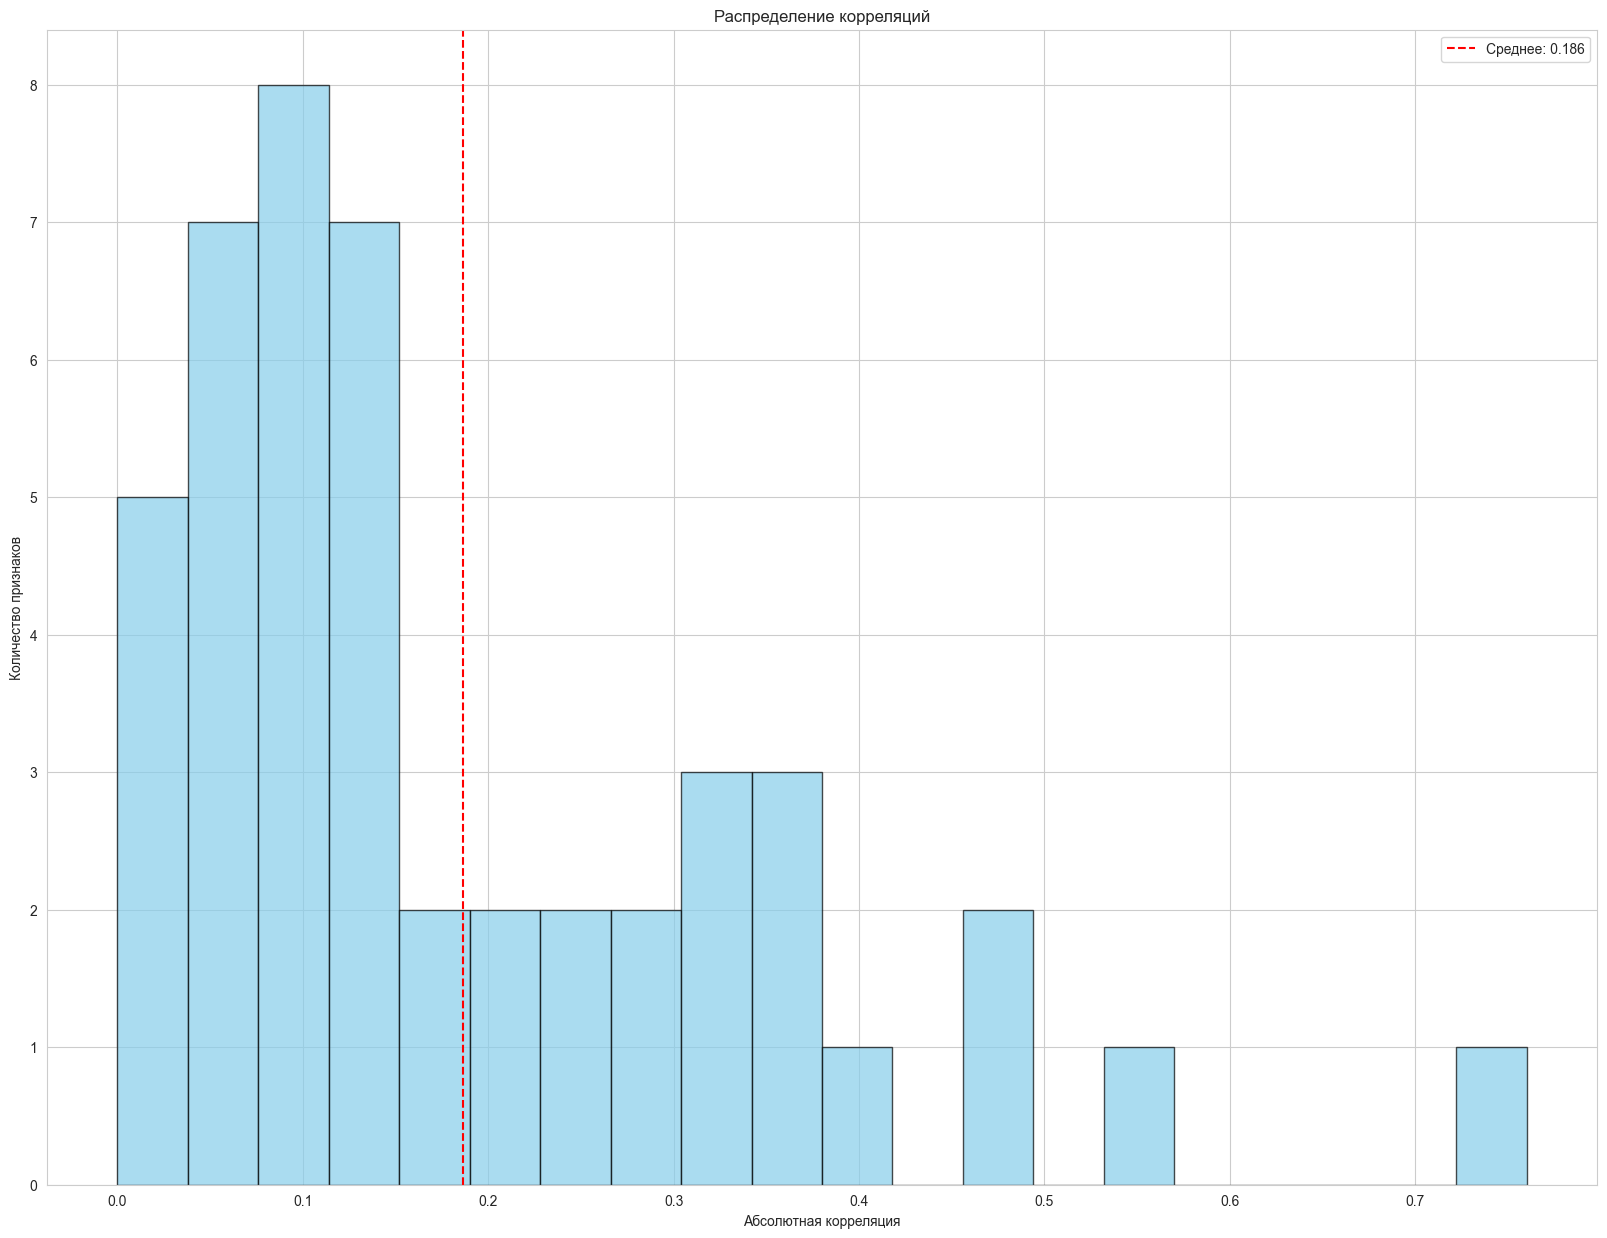

In [35]:
fig = plt.figure(figsize=(20, 15))

plt.hist(corr_df['correlation'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
plt.xlabel('Абсолютная корреляция')
plt.ylabel('Количество признаков')
plt.title('Распределение корреляций')
plt.axvline(corr_df['correlation'].mean(), color='red', linestyle='--', 
           label=f'Среднее: {corr_df["correlation"].mean():.3f}')
plt.legend()

In [36]:
print(f"  Максимальная корреляция: {corr_df['correlation'].max():.4f}")
print(f"  Минимальная корреляция: {corr_df['correlation'].min():.4f}")
print(f"  Средняя корреляция: {corr_df['correlation'].mean():.4f}")
print(f"  Медианная корреляция: {corr_df['correlation'].median():.4f}")

  Максимальная корреляция: 0.7601
  Минимальная корреляция: 0.0000
  Средняя корреляция: 0.1863
  Медианная корреляция: 0.1223


In [37]:
high_corr_features = corr_df[corr_df['correlation'] >= 0.1]
print(f"\nПризнаков с корреляцией >= {0.1}: {len(high_corr_features)}")


Признаков с корреляцией >= 0.1: 28


### Статические тесты различий между классами

Мы будем использовать дисперсионный анализ ANOVA, который используется для сравнения средних значений двух или более выборок

In [38]:
statistical_tests = []

for i, col in enumerate(feature_columns):
    if df[col].notna().sum() > 100:  
        groups = []
        group_names = []
        
        for category in ['hole_30', 'hole_60', 'hole_90']:
            group_data = df[df['hole_category'] == category][col].dropna()
            if len(group_data) > 10:
                groups.append(group_data)
                group_names.append(category)
        
        if len(groups) >= 2:
            try:
                f_stat, p_value = stats.f_oneway(*groups)
                
                means = [group.mean() for group in groups]
                stds = [group.std() for group in groups]
                
                ss_between = sum([len(group) * (group.mean() - df[col].mean())**2 for group in groups])
                ss_total = sum([(val - df[col].mean())**2 for val in df[col].dropna()])
                eta_squared = ss_between / ss_total if ss_total > 0 else 0
                
                statistical_tests.append({
                    'feature': col,
                    'f_statistic': f_stat,
                    'p_value': p_value,
                    'significant': p_value < 0.05,
                    'eta_squared': eta_squared,
                    'n_groups': len(groups),
                    'mean_hole_30': means[0] if len(means) > 0 else np.nan,
                    'mean_hole_60': means[1] if len(means) > 1 else np.nan,
                    'mean_hole_90': means[2] if len(means) > 2 else np.nan,
                    'std_hole_30': stds[0] if len(stds) > 0 else np.nan,
                    'std_hole_60': stds[1] if len(stds) > 1 else np.nan,
                    'std_hole_90': stds[2] if len(stds) > 2 else np.nan
                })
                    
            except Exception as e:
                continue

stats_df = pd.DataFrame(statistical_tests).sort_values('f_statistic', ascending=False)

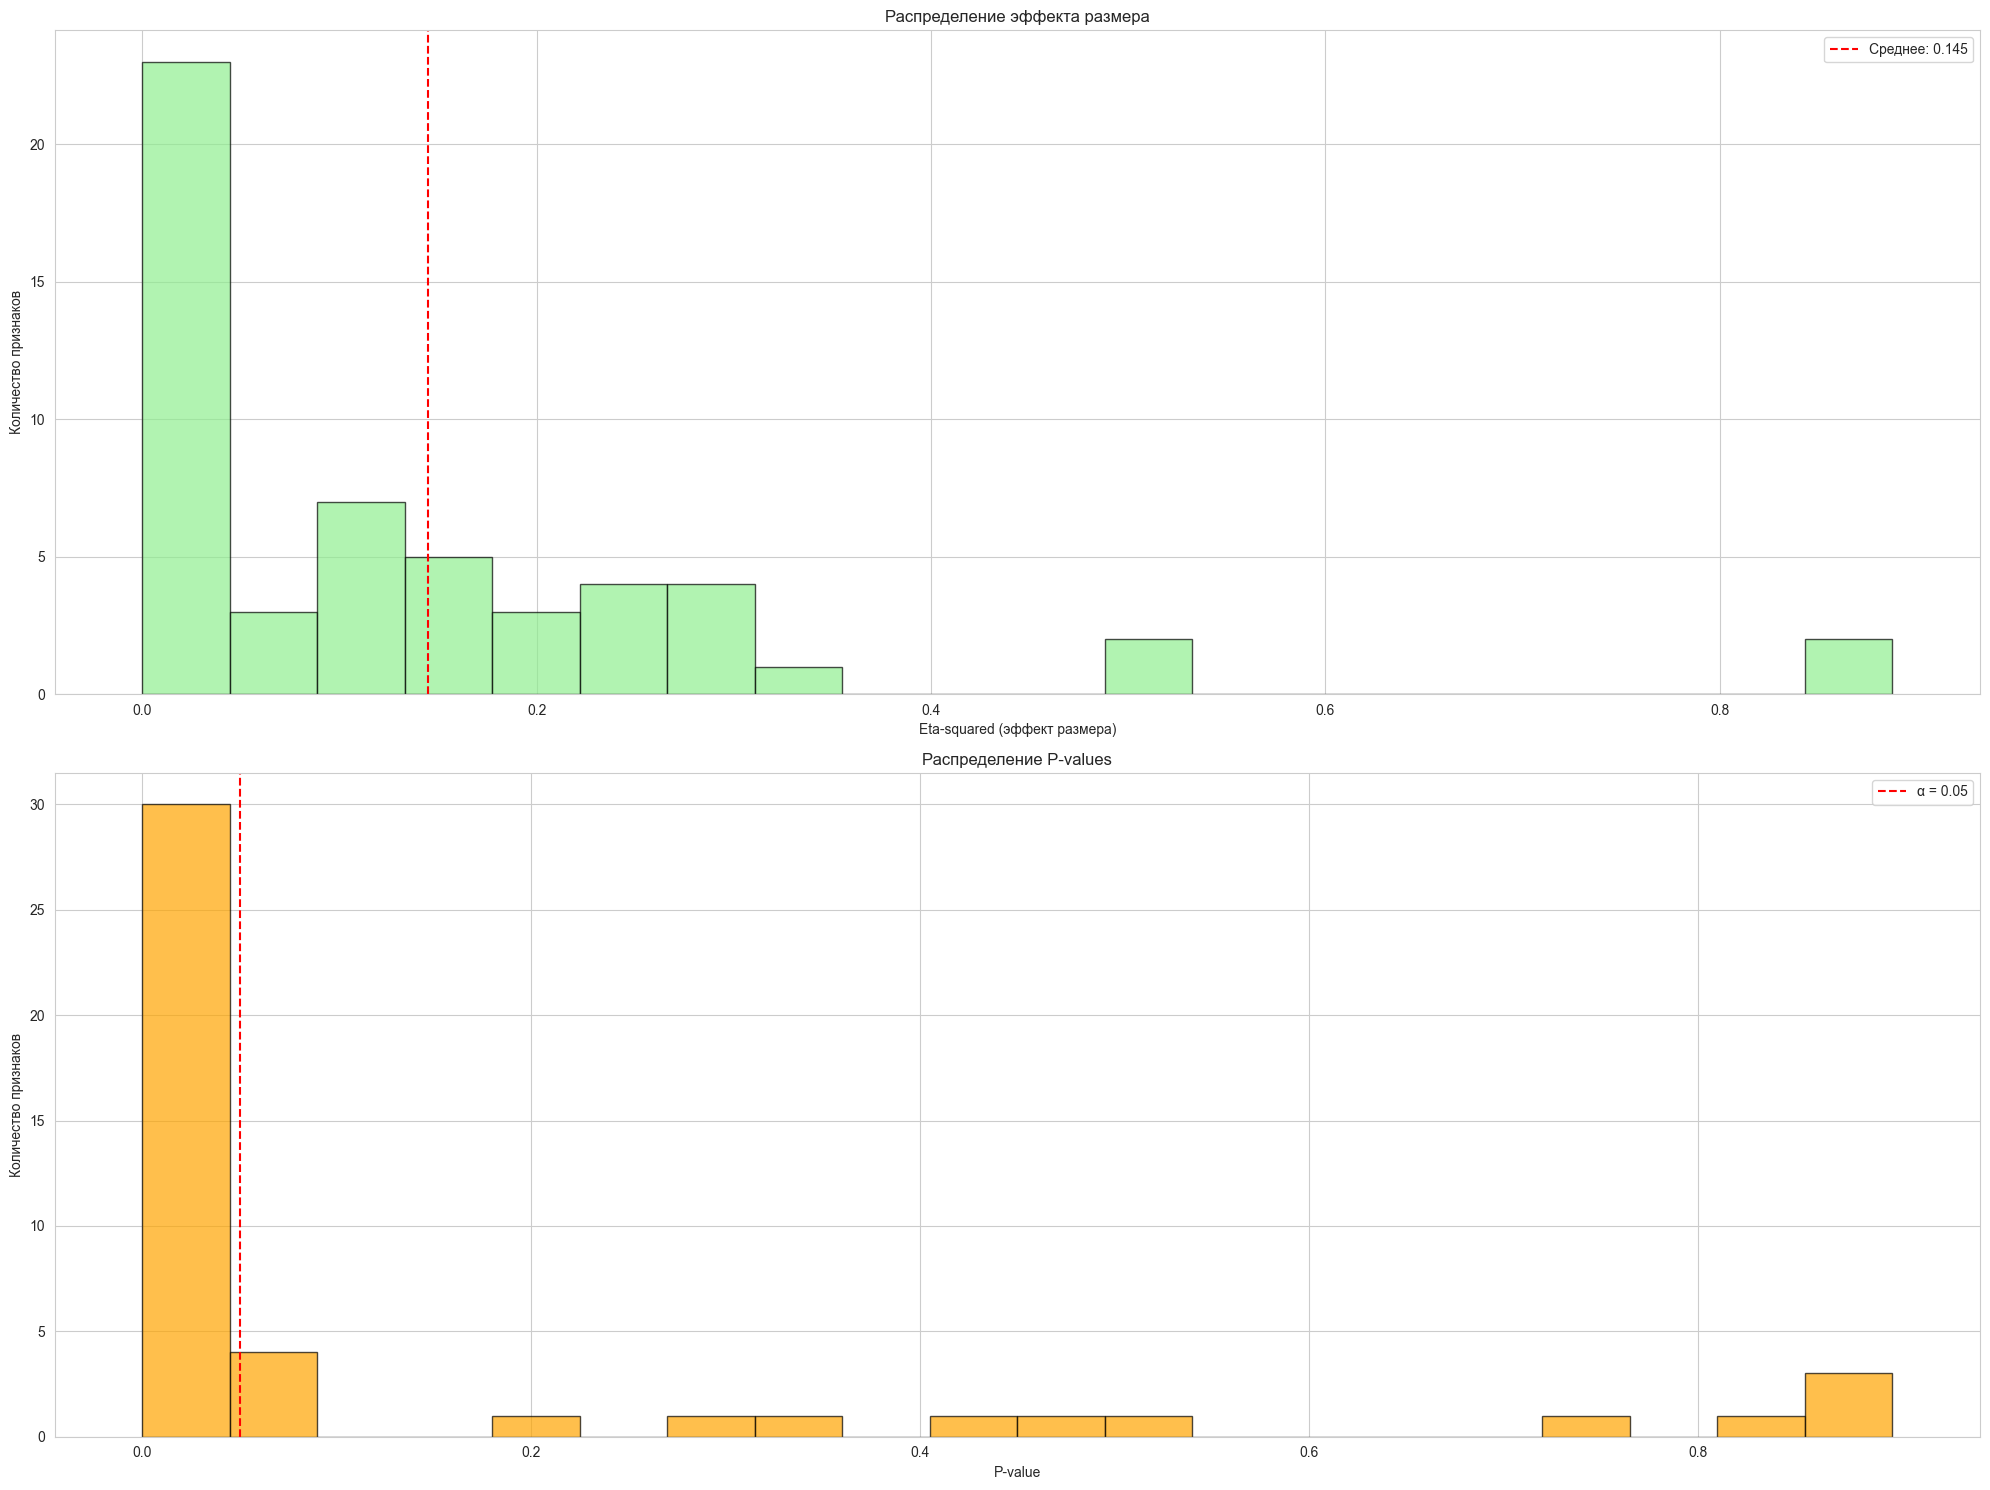

In [39]:
fig = plt.figure(figsize=(20, 15))

plt.subplot(2, 1, 1)
plt.hist(stats_df['eta_squared'], bins=20, alpha=0.7, color='lightgreen', edgecolor='black')
plt.xlabel('Eta-squared (эффект размера)')
plt.ylabel('Количество признаков')
plt.title('Распределение эффекта размера')
plt.axvline(stats_df['eta_squared'].mean(), color='red', linestyle='--',
           label=f'Среднее: {stats_df["eta_squared"].mean():.3f}')
plt.legend()

plt.subplot(2, 1, 2)
plt.hist(stats_df['p_value'], bins=20, alpha=0.7, color='orange', edgecolor='black')
plt.xlabel('P-value')
plt.ylabel('Количество признаков')
plt.title('Распределение P-values')
plt.axvline(0.05, color='red', linestyle='--', label='α = 0.05')
plt.legend()

plt.tight_layout()
plt.show()

In [40]:
print(f"Обработано признаков: {len(stats_df)}")
print(f"Статистически значимых (p < 0.05): {stats_df['significant'].sum()}")

Обработано признаков: 54
Статистически значимых (p < 0.05): 31


Text(0.5, 1.0, 'Статистическая значимость признаков')

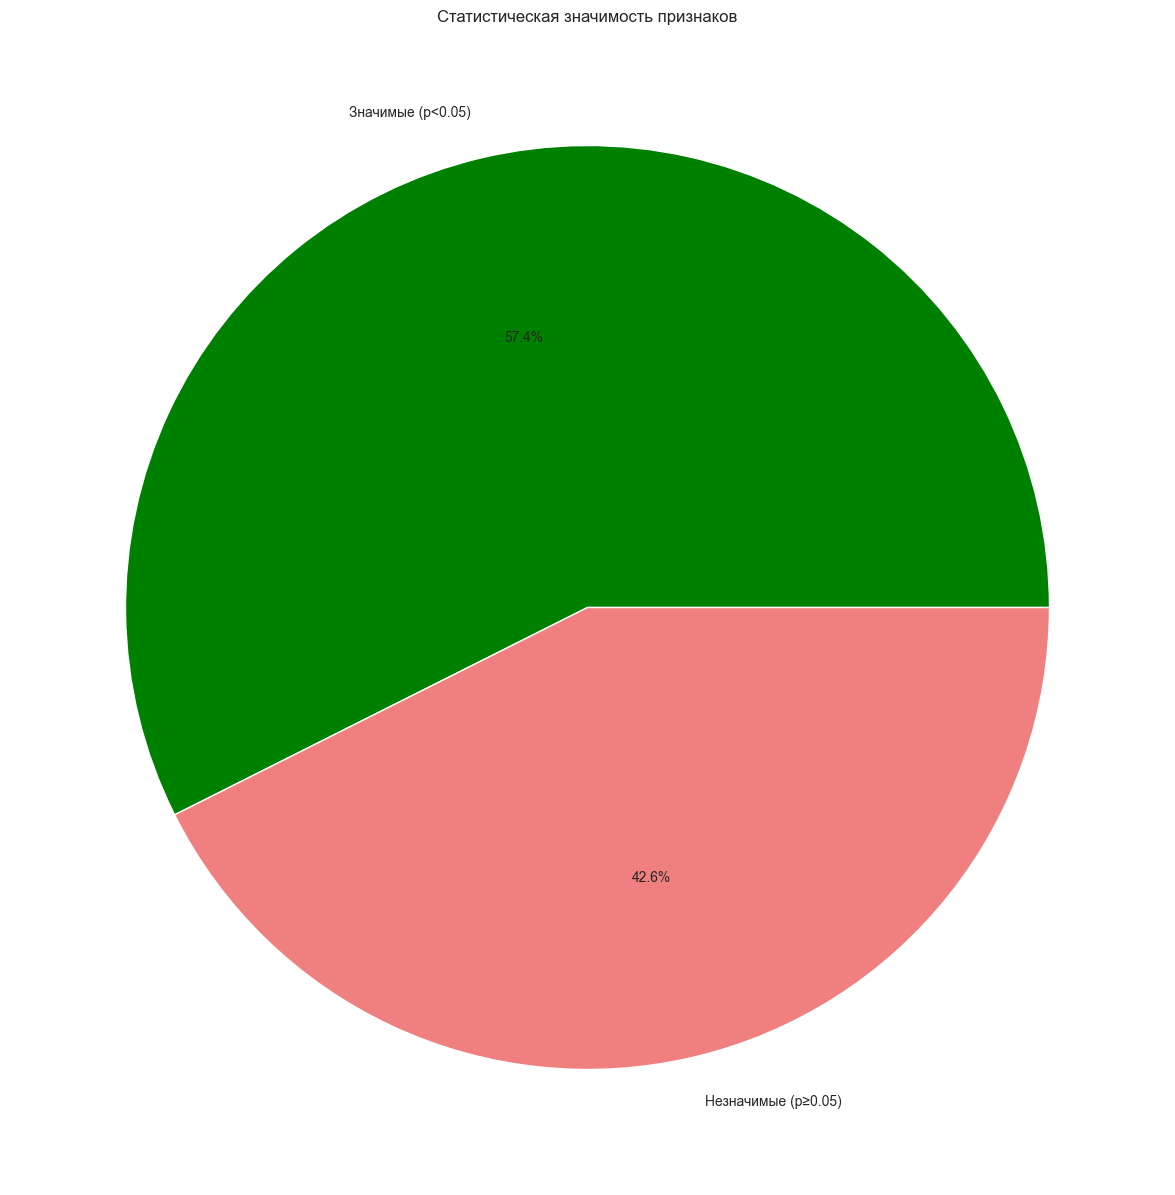

In [41]:
fig = plt.figure(figsize=(20, 15))

significant_count = stats_df['significant'].sum()
non_significant_count = len(stats_df) - significant_count
plt.pie([significant_count, non_significant_count], 
        labels=['Значимые (p<0.05)', 'Незначимые (p≥0.05)'],
        autopct='%1.1f%%', colors=['green', 'lightcoral'])
plt.title('Статистическая значимость признаков')

In [42]:
stats_df.head(20)[['feature', 'f_statistic', 'p_value', 'significant', 'eta_squared']]

,feature,f_statistic,p_value,significant,eta_squared
25,Давление в правой задней внешней шине,1640.450027,1.057584e-122,True,0.887719
26,Температура в правой задней внешней шине,1640.450027,1.057584e-122,True,0.887719
19,Давление в левой задней внешней шине,217.632724,2.112678e-50,True,0.517433
0,Скорость,105.359187,9.472589e-32,True,0.322009
21,Давление в левой задней внутренней шине,103.472207,2.356079e-31,True,0.268694
8,путь,90.803537,1.346631e-28,True,0.285955
53,shtraf,76.020901,3.900769e-25,True,0.256199
20,Температура в левой задней внешней шине,64.735405,2.746316e-22,True,0.169331
22,Температура в левой задней внутренней шине,60.549510,3.512509e-21,True,0.158757
41,nom_hole,54.876443,1.240113e-19,True,0.530969


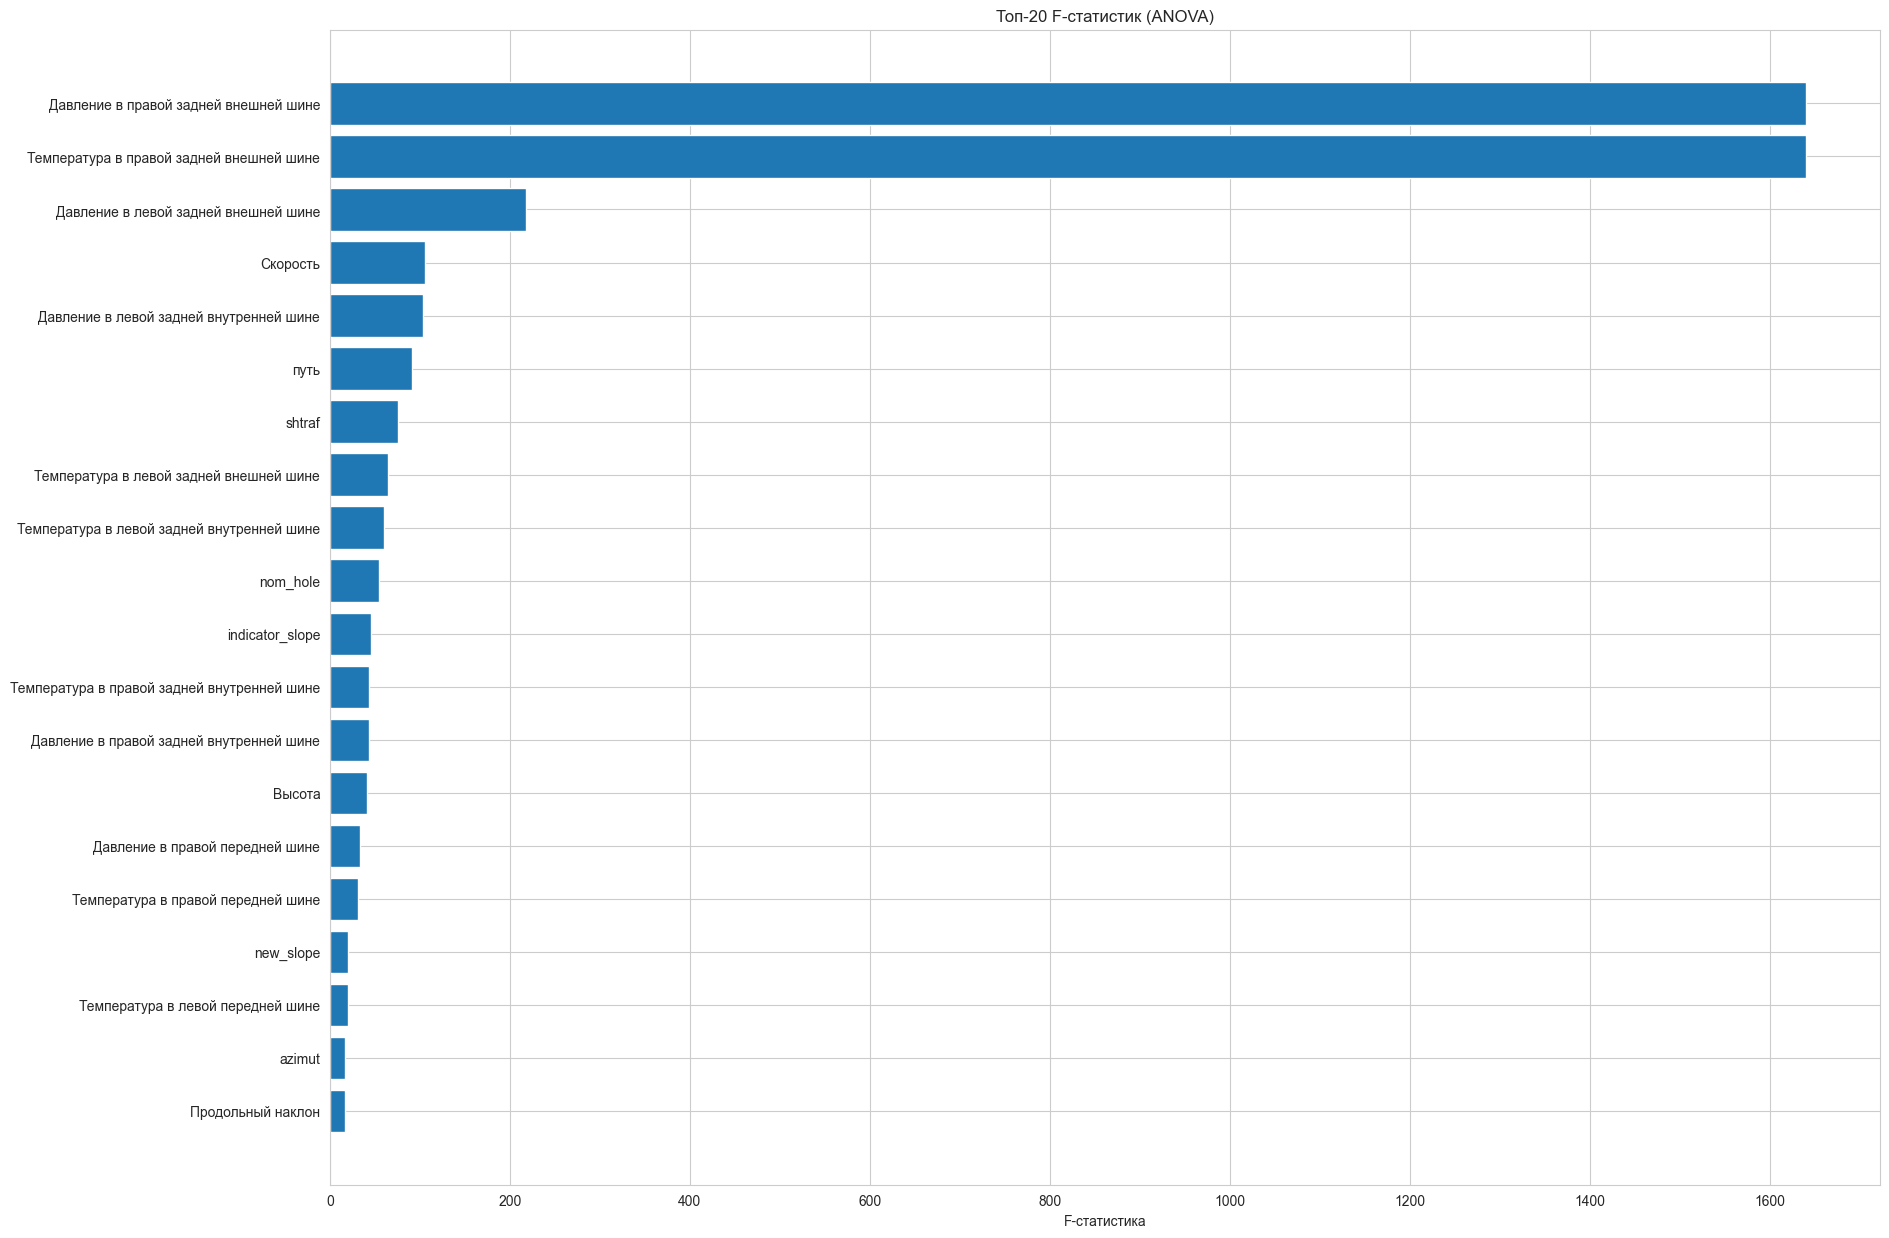

In [43]:
fig = plt.figure(figsize=(20, 15))

top_f = stats_df.head(20)
plt.barh(range(len(top_f)), top_f['f_statistic'])
plt.yticks(range(len(top_f)), top_f['feature'])
plt.xlabel('F-статистика')
plt.title('Топ-20 F-статистик (ANOVA)')
plt.gca().invert_yaxis()

### Автоматический подбор параметра

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, RFE

In [45]:
max_missing_percent = 30 
good_features = []

for col in feature_columns:
    missing_percent = (df[col].isnull().sum() / len(df)) * 100
    if missing_percent <= max_missing_percent:
        good_features.append(col)

print(f"Признаков с пропусками <= {max_missing_percent}%: {len(good_features)}")

Признаков с пропусками <= 30%: 54


In [46]:
df_clean = df.copy()

for col in good_features:
    df_clean[col] = df_clean[col].fillna(df_clean[col].median())

In [47]:
X = df_clean[good_features].copy()
y = df_clean['hole_category'].copy()

In [48]:
y_encoded = le.fit_transform(y)

Для автоподбора параметров сравним три метода - ANOVA, mutual information, RFE

F-тест (ANOVA)

In [49]:
selector_f = SelectKBest(score_func=f_classif, k=20)
X_selected_f = selector_f.fit_transform(X, y_encoded)
selected_features_f = [good_features[i] for i in selector_f.get_support(indices=True)]
print(f"Отобрано признаков: {len(selected_features_f)}")
print("Отобранные признаки:")
for i, feature in enumerate(selected_features_f, 1):
    print(f"  {i:2d}. {feature}")

Отобрано признаков: 20
Отобранные признаки:
   1. Скорость
   2. Высота
   3. Уровень топлива, проценты
   4. путь
   5. Давление в левой задней внешней шине
   6. Температура в левой задней внешней шине
   7. Давление в левой задней внутренней шине
   8. Давление в правой задней внутренней шине
   9. Температура в правой задней внутренней шине
  10. Давление в правой задней внешней шине
  11. Температура в правой задней внешней шине
  12. Давление левый передний цилиндр
  13. Продольный наклон
  14. azimut
  15. Давление левый передний цилиндр_
  16. Давление левый задний цилиндр_
  17. nom_hole
  18. new_slope
  19. indicator_slope
  20. shtraf


Mutual Information

In [50]:
selector_mi = SelectKBest(score_func=mutual_info_classif, k=20)
X_selected_mi = selector_mi.fit_transform(X, y_encoded)
selected_features_mi = [good_features[i] for i in selector_mi.get_support(indices=True)]
print(f"Отобрано признаков: {len(selected_features_mi)}")
print("Отобранные признаки:")
for i, feature in enumerate(selected_features_mi, 1):
    print(f"  {i:2d}. {feature}")

Отобрано признаков: 20
Отобранные признаки:
   1. Скорость
   2. Широта
   3. Долгота
   4. Высота
   5. Уровень топлива, проценты
   6. путь
   7. Давление в левой задней внешней шине
   8. Температура в левой задней внешней шине
   9. Давление в левой задней внутренней шине
  10. Температура в левой задней внутренней шине
  11. Давление в правой задней внутренней шине
  12. Давление в правой задней внешней шине
  13. Температура в правой задней внешней шине
  14. Давление левый передний цилиндр
  15. Давление левый задний цилиндр
  16. azimut
  17. nom_hole
  18. new_slope
  19. indicator_slope
  20. shtraf


Recursive Feature Elimination (RFE)

In [51]:
rf_estimator = RandomForestClassifier(n_estimators=50, random_state=42)
selector_rfe = RFE(estimator=rf_estimator, n_features_to_select=15)
X_selected_rfe = selector_rfe.fit_transform(X, y_encoded)
selected_features_rfe = [good_features[i] for i in selector_rfe.get_support(indices=True)]
print(f"Отобрано признаков: {len(selected_features_rfe)}")
print("Отобранные признаки:")
for i, feature in enumerate(selected_features_rfe, 1):
    print(f"  {i:2d}. {feature}")


Отобрано признаков: 15
Отобранные признаки:
   1. Скорость
   2. Широта
   3. Долгота
   4. Высота
   5. путь
   6. Давление в правой задней внешней шине
   7. Температура в правой задней внешней шине
   8. Давление левый передний цилиндр
   9. Давление левый задний цилиндр
  10. azimut
  11. Давление левый передний цилиндр_
  12. Давление левый задний цилиндр_
  13. nom_hole
  14. new_slope
  15. shtraf


Сравним разные подходы и выберем лучший

Для этого возьмем модель машинного обучения и сравним показатели метрик при выборе определенных параметров - создадим универсальную функцию, которая будет принимать данные, выборки обучающие и тестовые, а возвращает метрики

In [52]:
def train_and_evaluate_model(features, X_train, X_test, y_train, y_test, feature_names):
    
    feature_indices = [feature_names.index(f) for f in features if f in feature_names]
    
    if len(feature_indices) == 0:
        return None
    
    X_train_subset = X_train[:, feature_indices]
    X_test_subset = X_test[:, feature_indices]
    
    model = RandomForestClassifier(
        n_estimators=100,
        random_state=42,
        class_weight='balanced',
        max_depth=10,
        min_samples_split=5,
        min_samples_leaf=2
    )
    
    model.fit(X_train_subset, y_train)
    
    y_pred = model.predict(X_test_subset)
    
    accuracy = accuracy_score(y_test, y_pred)
    
    return {
        'n_features': len(features),
        'accuracy': accuracy,
        'features': features
    }

Подготовим данные для обучения

In [53]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

feature_sets = {
    'Топ-5 по корреляции': corr_df.head(5)['feature'].tolist(),
    'Топ-10 по корреляции': corr_df.head(10)['feature'].tolist(),
    'Топ-15 по корреляции': corr_df.head(15)['feature'].tolist(),
    'Топ-5 по F-статистике': stats_df.head(5)['feature'].tolist(),
    'Топ-10 по F-статистике': stats_df.head(10)['feature'].tolist(),
    'Топ-15 по F-статистике': stats_df.head(15)['feature'].tolist(),
    'F-тест (ANOVA)': selected_features_f,
    'Mutual Information': selected_features_mi,
    'RFE': selected_features_rfe,
    'Статистически значимые': stats_df[stats_df['significant']]['feature'].tolist(),
    'Все признаки': good_features[:30]
}

Тестируем разные наборы

In [54]:
results = []
for name, features in feature_sets.items():
    available_features = [f for f in features if f in good_features]
    if len(available_features) > 0:
        result = train_and_evaluate_model(available_features, X_train, X_test, y_train, y_test, good_features)
        if result:
            result['method'] = name
            results.append(result)

results_df = pd.DataFrame(results).sort_values('accuracy', ascending=False)


In [55]:
results_df[['method', 'n_features', 'accuracy']]

,method,n_features,accuracy
4,Топ-10 по F-статистике,10,1.000000
5,Топ-15 по F-статистике,15,1.000000
6,F-тест (ANOVA),20,1.000000
7,Mutual Information,20,1.000000
8,RFE,15,1.000000
9,Статистически значимые,31,1.000000
0,Топ-5 по корреляции,5,0.992593
1,Топ-10 по корреляции,10,0.992593
2,Топ-15 по корреляции,15,0.992593
10,Все признаки,30,0.955556


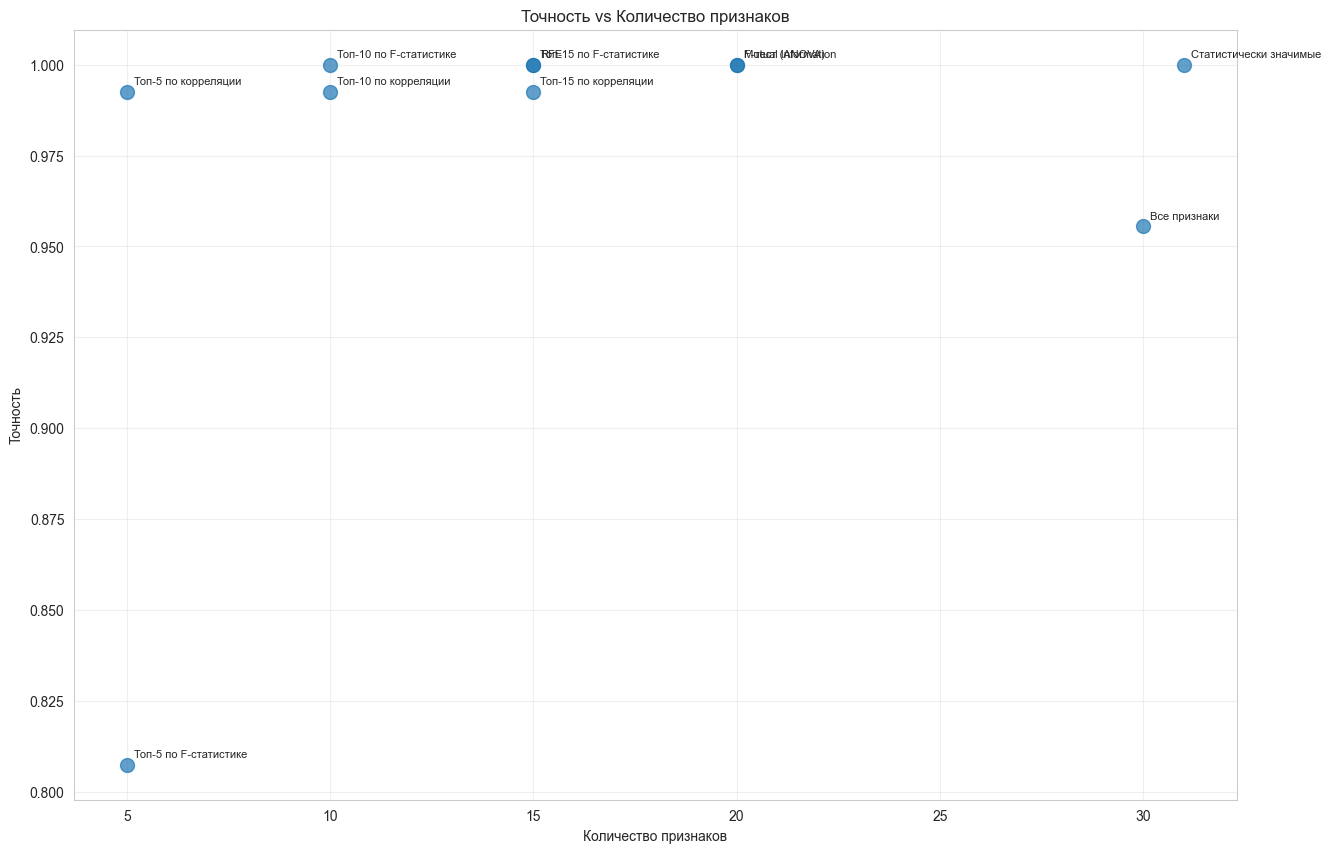

In [56]:
plt.scatter(results_df['n_features'], results_df['accuracy'], s=100, alpha=0.7)
for i, row in results_df.iterrows():
    plt.annotate(row['method'], (row['n_features'], row['accuracy']), 
                xytext=(5, 5), textcoords='offset points', fontsize=8)
plt.xlabel('Количество признаков')
plt.ylabel('Точность')
plt.title('Точность vs Количество признаков')
plt.grid(True, alpha=0.3)

Разные методы дают все отличный результат - я предлогаю взять метод статистически важных, поскольку это дает нам больший набор данных для классификации

In [67]:
best_method = results_df.iloc[5]
best_features = best_method['features']

In [68]:
print(f"best_method: {best_method['method']}")
print(f"accuracy: {best_method['accuracy']:.4f}")
print(f"n_features: {best_method['n_features']}")

best_method: Статистически значимые
accuracy: 1.0000
n_features: 31


In [69]:
best_features

['Давление в правой задней внешней шине',
 'Температура в правой задней внешней шине',
 'Давление в левой задней внешней шине',
 'Скорость',
 'Давление в левой задней внутренней шине',
 'путь',
 'shtraf',
 'Температура в левой задней внешней шине',
 'Температура в левой задней внутренней шине',
 'nom_hole',
 'indicator_slope',
 'Температура в правой задней внутренней шине',
 'Давление в правой задней внутренней шине',
 'Высота',
 'Давление в правой передней шине',
 'Температура в правой передней шине',
 'new_slope',
 'Температура в левой передней шине',
 'azimut',
 'Продольный наклон',
 'Уровень топлива, проценты',
 'Долгота',
 'Широта',
 'Давление левый передний цилиндр_',
 'Y Rotation',
 'Давление левый передний цилиндр',
 'Ускорение по оси X',
 'Давление правый передний цилиндр',
 'Давление левый задний цилиндр_',
 'Давление левый задний цилиндр',
 'рекомендованная скорость_min']

### Обучение модели

In [70]:
feature_indices = [good_features.index(f) for f in best_features if f in good_features]

In [71]:
X_final = X_scaled[:, feature_indices]
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(
    X_final, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

In [72]:
frf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced',
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2
)

frf_model.fit(X_train_final, y_train_final)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=2, min_samples_split=5,
                       random_state=42)

Давайте рассмотрим важность признаков

In [73]:
feature_importance = pd.DataFrame({
    'feature': best_features,
    'importance': frf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("Важность признаков в финальной модели:")
for i, row in feature_importance.iterrows():
    print(f"  {row['feature']}: {row['importance']:.4f}")

Важность признаков в финальной модели:
  nom_hole: 0.2015
  shtraf: 0.0859
  Давление в правой задней внешней шине: 0.0761
  Долгота: 0.0725
  Высота: 0.0706
  Температура в правой задней внешней шине: 0.0573
  Скорость: 0.0470
  Широта: 0.0464
  new_slope: 0.0314
  Уровень топлива, проценты: 0.0268
  путь: 0.0266
  Давление левый задний цилиндр_: 0.0261
  azimut: 0.0244
  Давление в левой задней внутренней шине: 0.0231
  Температура в левой задней внутренней шине: 0.0220
  indicator_slope: 0.0204
  Температура в левой задней внешней шине: 0.0200
  Давление левый задний цилиндр: 0.0195
  Давление в левой задней внешней шине: 0.0189
  Давление левый передний цилиндр: 0.0180
  Продольный наклон: 0.0173
  Давление правый передний цилиндр: 0.0100
  Давление левый передний цилиндр_: 0.0095
  Температура в правой задней внутренней шине: 0.0085
  Давление в правой задней внутренней шине: 0.0072
  Y Rotation: 0.0051
  Температура в правой передней шине: 0.0043
  Ускорение по оси X: 0.0020
  Да

Получается, можно было обучить модель на соврешенно другом кол-во данных, учитывая как пример важность >= 0.01

In [74]:
y_pred_final = frf_model.predict(X_test_final)
final_accuracy = accuracy_score(y_test_final, y_pred_final)

print(f"accuracy_score: {final_accuracy:.4f}")

accuracy_score: 1.0000


In [75]:
print(classification_report(y_test_final, y_pred_final, target_names=le.classes_))

              precision    recall  f1-score   support

     hole_30       1.00      1.00      1.00        15
     hole_60       1.00      1.00      1.00        15
     hole_90       1.00      1.00      1.00        10
     no_hole       1.00      1.00      1.00        95

    accuracy                           1.00       135
   macro avg       1.00      1.00      1.00       135
weighted avg       1.00      1.00      1.00       135



<Axes: >

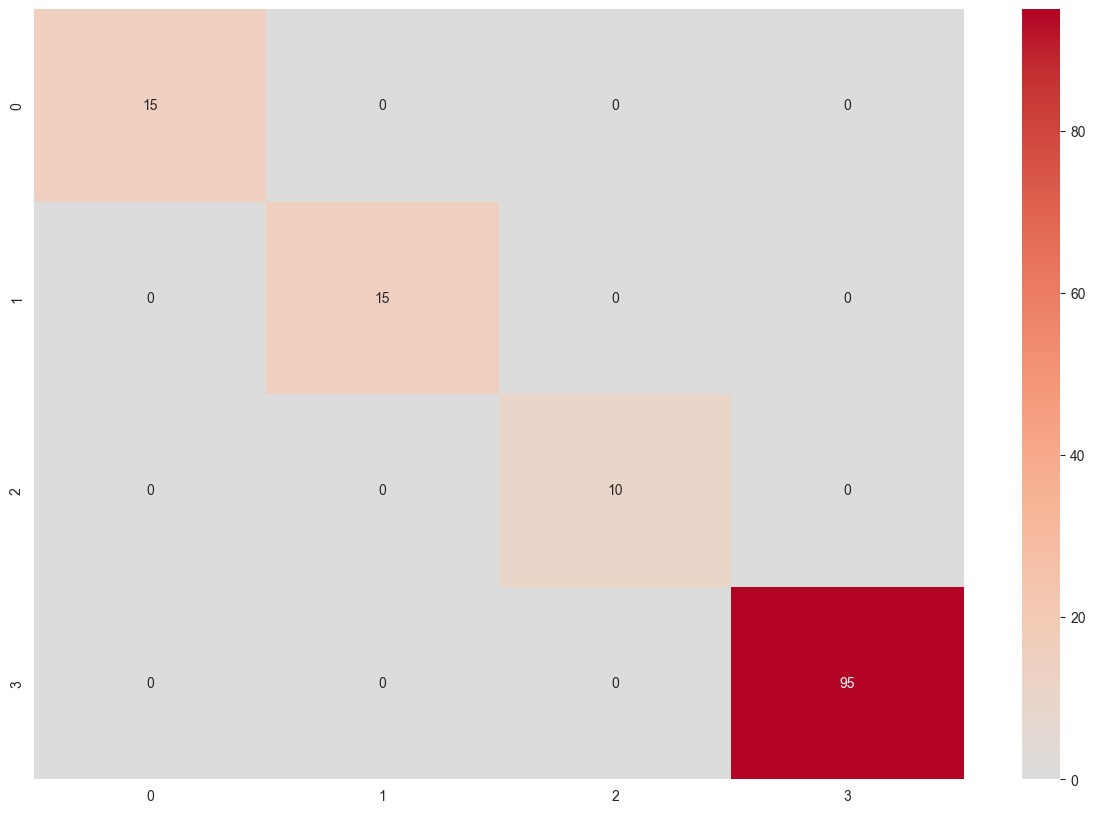

In [77]:
sns.heatmap(confusion_matrix(y_test_final, y_pred_final), annot=True, cmap='coolwarm', center=0)

Мы можем заметить разницу даже во время выбор лучшей модели + у нас поменялись весовые категории параметров обучение, то есть оптимальный вариант в данном случае >= 0.02